# Diagnosis Level Stres

## Informasi Kolom Dataset
- sr   = Snoring Range
- rr   = Respiration Rate
- t    = Body temperature
- lm   = Limb Movement Rate
- bo   = Blood Oxygen Levels
- rem  = Eye movement
- sr.1 = Number of Hours of Sleep
- hr   = Heart Rate
- sl   = Stress Level

## Import libraries yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
sns.set_style('ticks')
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv('stress_dataset.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


## Data Understanding
- Dataframe shape
- head and tail
- dtypes
- describe

In [4]:
# cek bentuk dataframe
df.shape

(630, 9)

In [5]:
# cek kolom yang ada
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [6]:
# 5 data teratas
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
# 5 data terakhir
df.tail()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [8]:
# mengecek tipe data dari masing-masing kolom
df.dtypes

sr      float64
rr      float64
t       float64
lm      float64
bo      float64
rem     float64
sr.1    float64
hr      float64
sl        int64
dtype: object

In [9]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [10]:
# ringkasan dataset stress level
df.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


## Data Preparation
- Menghapus baris dan kolom yang tidak relevan
- Mengindentifikasi kolom yang duplikat
- Menamai kolom supaya konsisten
- Membuat fitur

Karena semua kolom berguna, tidak ada kolom yang dihapus

In [11]:
# Cek apakah ada row yang null
df.isna().sum() # Tidak ada

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [12]:
# Cek apakah ada row yang duplikat
df.loc[df.duplicated()]

,sr,rr,t,lm,bo,rem,sr.1,hr,sl


Karena tidak ada kolom yang unique, jadi tidak perlu mengecek data unique yang duplikat

## Feature Understanding
- Histogram
- KDE
- Boxplot

In [13]:
cols = df.columns

In [14]:
# cek persebaran stress level
sl = df['sl']
# print(sl.value_counts())
# sl.value_counts().index

### Visualisasi Barplot untuk Stress Level

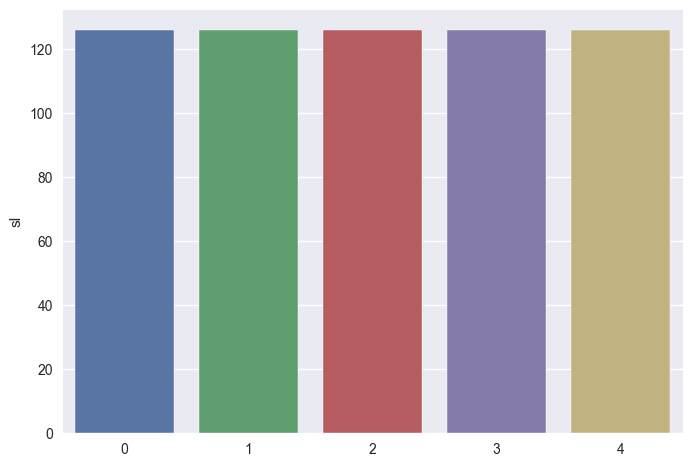

In [15]:
sns.barplot(y=sl.value_counts(), x=sl.value_counts().index )
plt.show()

Masing masing stress level memiliki jumlah yang sama

### Melihat Densitas features

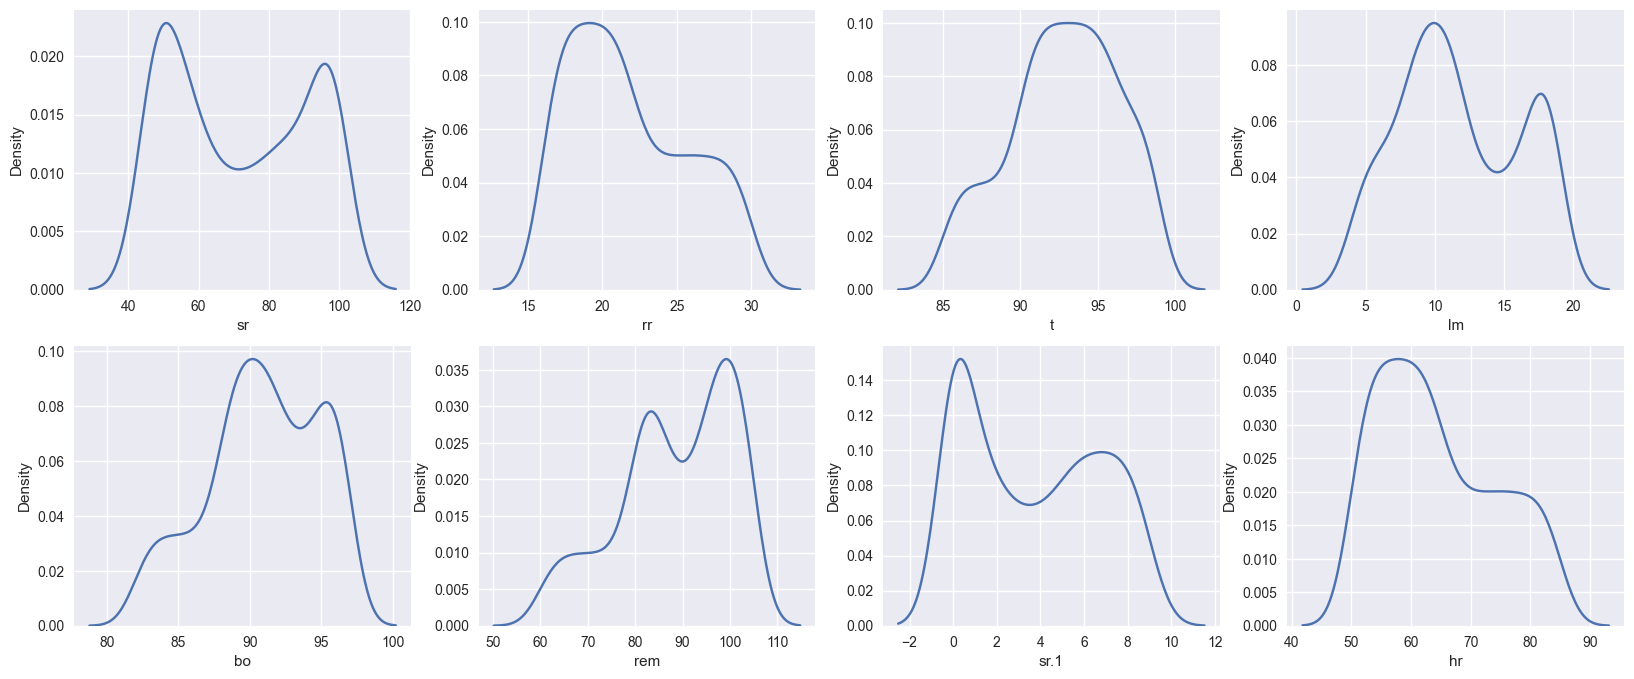

In [16]:
# sns.kdeplot(df['sr'])
# sns.kdeplot(df['sr'])

fig, axs = plt.subplots(ncols=4, figsize=(20, 8), nrows=2)
current = 0
for i in range(2):
    for j in range(4):
        sns.kdeplot(df[df.columns[current]], ax=axs[i][j])
        current += 1
plt.show()

### Mengecek Anomali

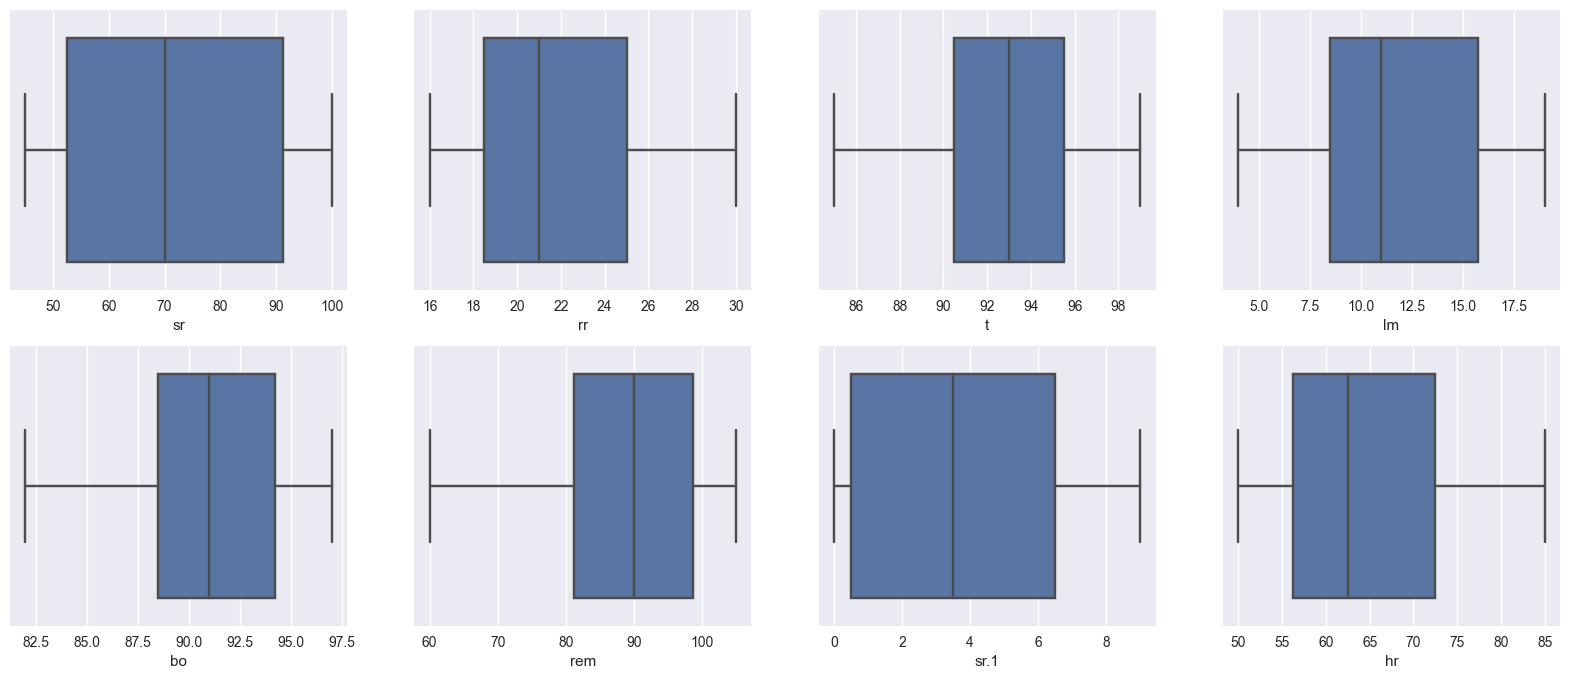

In [17]:
# sns.boxplot(df.drop(['sl'], axis.copy())
fig, axs = plt.subplots(ncols=4, figsize=(20, 8), nrows=2)
current = 0
for i in range(2):
    for j in range(4):
        sns.boxplot(df[df.columns[current]], ax=axs[i][j], x=df[df.columns[current]])
        current += 1
plt.show()

Ternyata tidak ada data yang anomali

## Feature Relationship

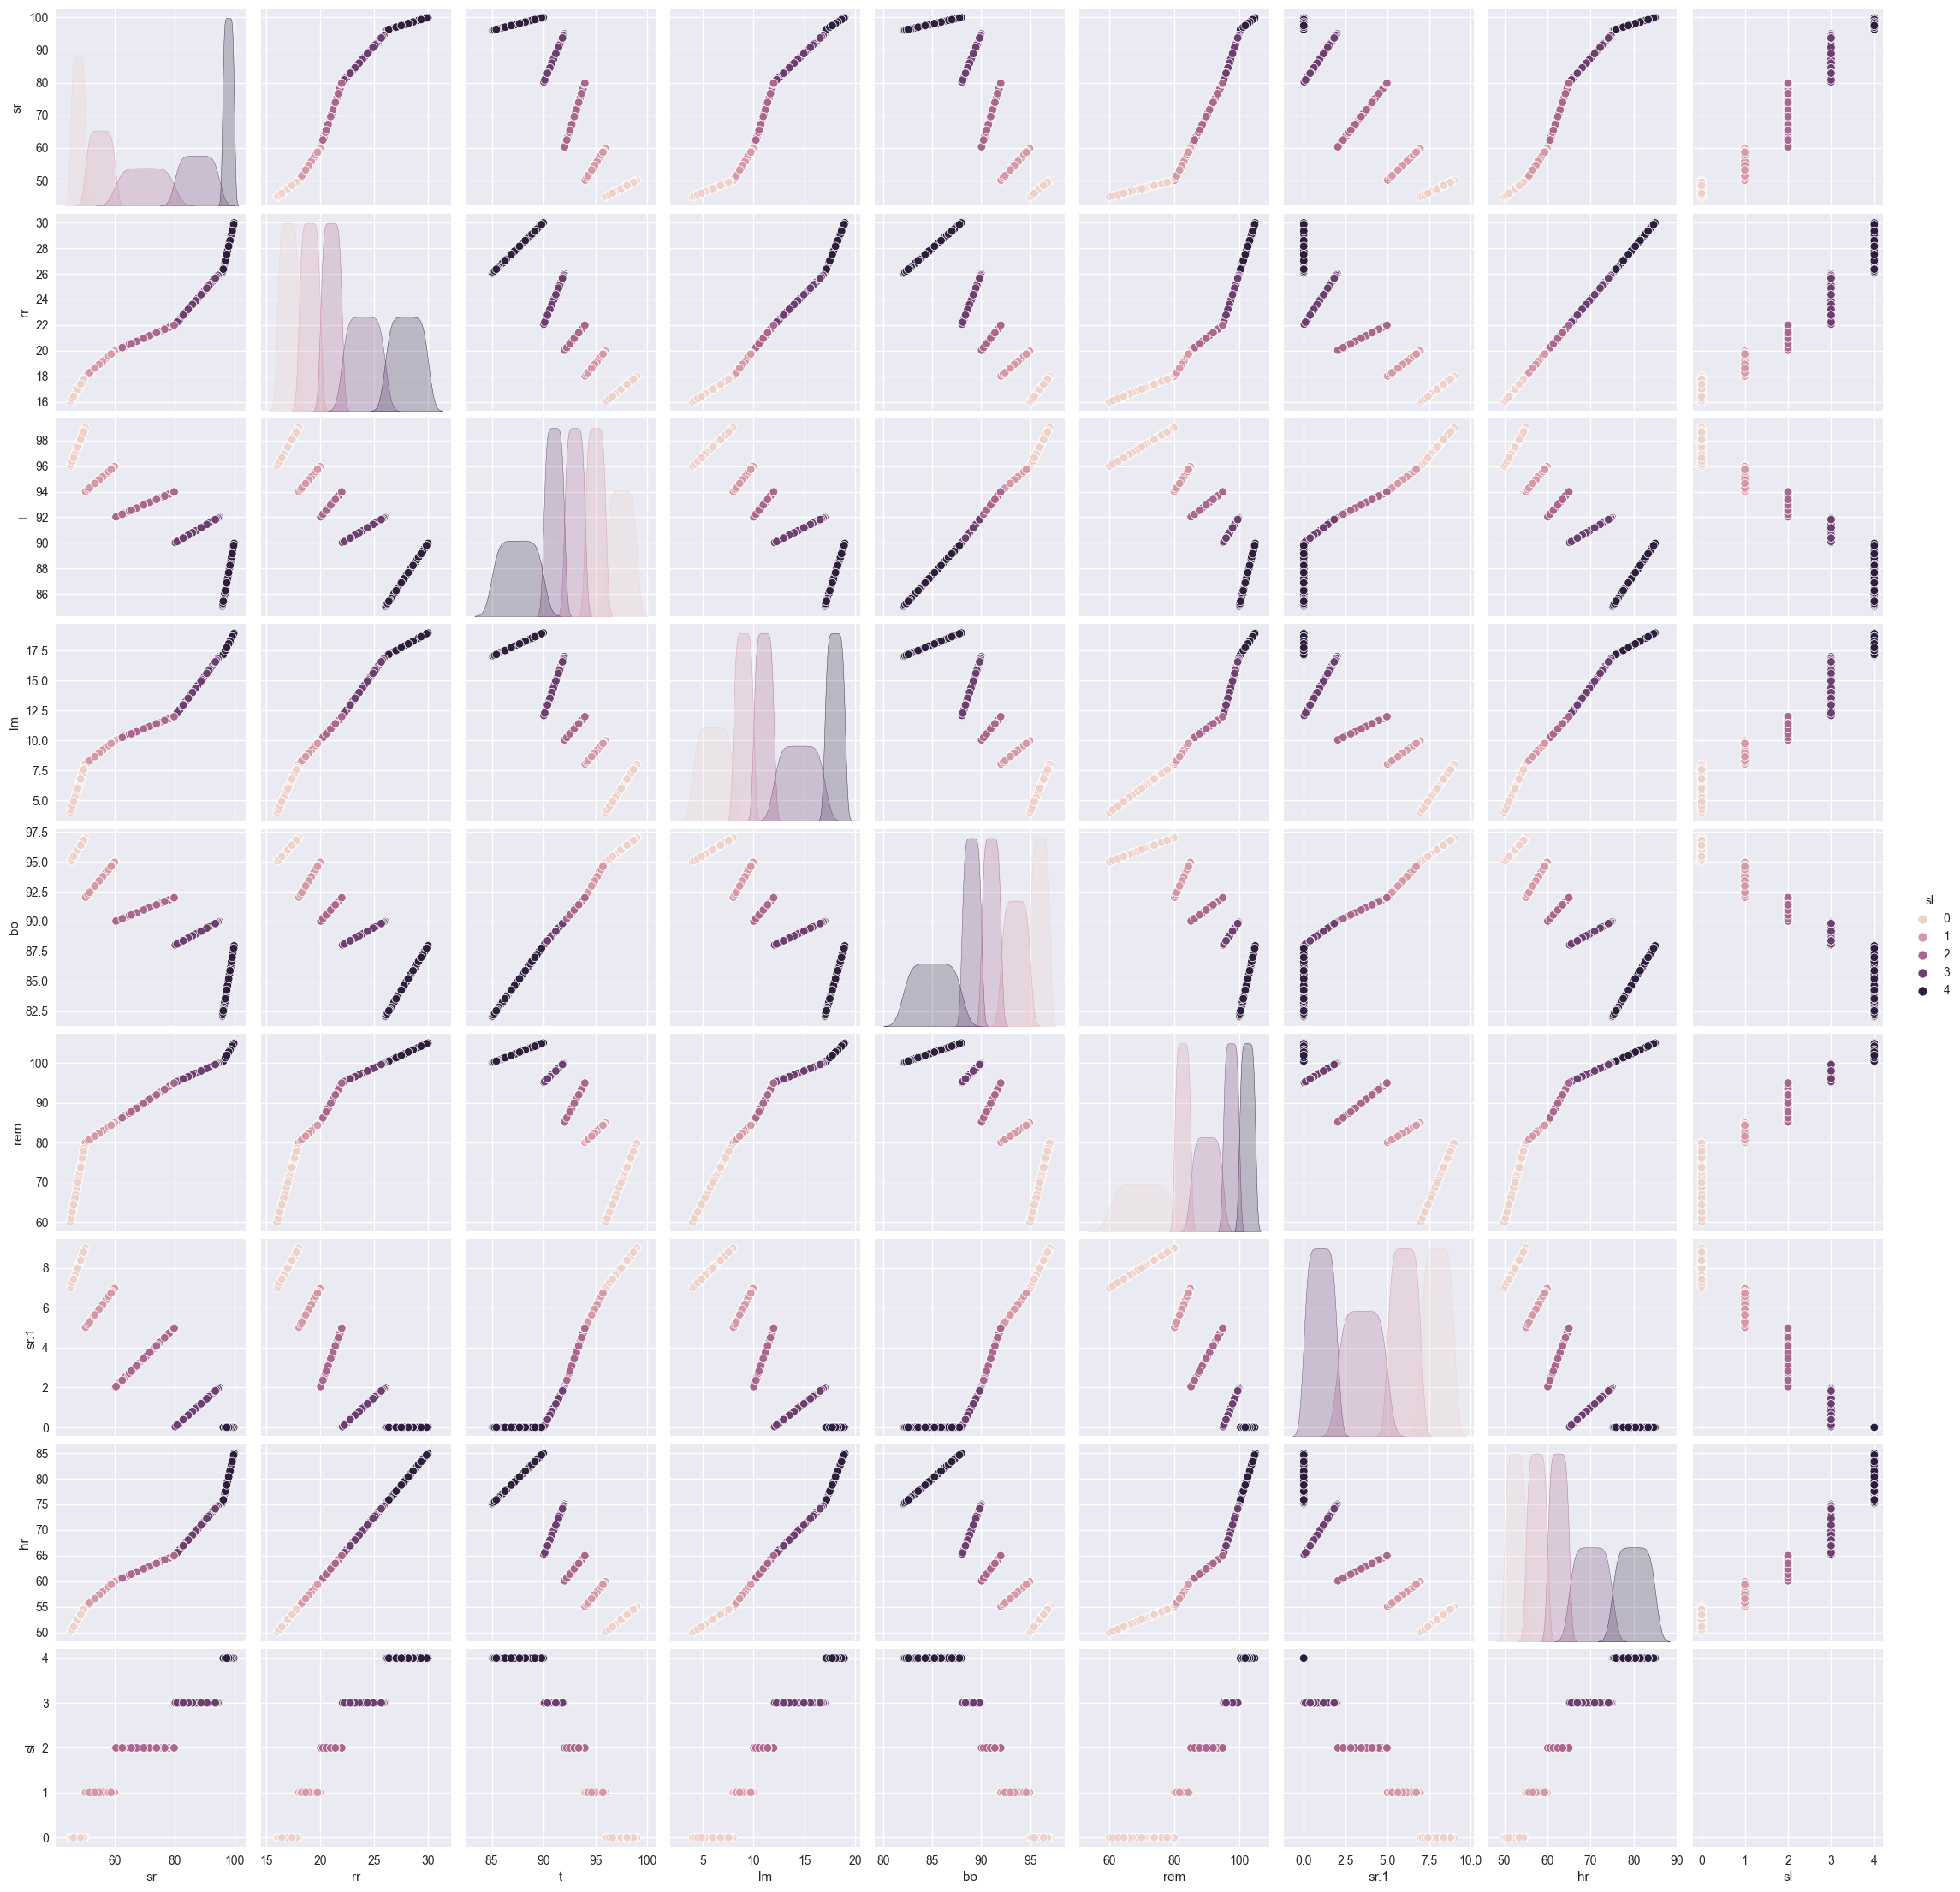

In [24]:
sns.pairplot(df, vars=df.columns, hue='sl')
plt.show()

Bisa dilihat, t, bo, dan sr.1 memiliki korelasi yang buruk dengan sr, rr, lm, rem, dan hr

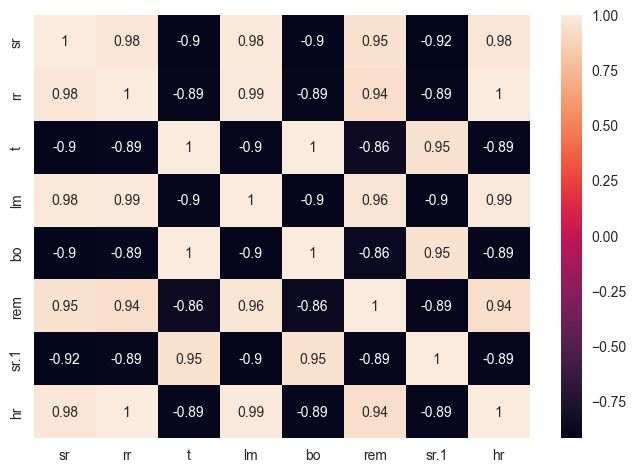

In [19]:
sns.heatmap(df.drop('sl', axis=1).copy().corr(), annot=True)
plt.show()

## Memisahkan Data Training dan Data Testing

In [20]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args, titles=cycle([''])):
    html_str = ''
    for df, title in zip(args, chain(titles, cycle(['</br>']))):
        html_str += '<th style="text-align:center"><td style="vertical-align:top; horizontal-align:center;">'
        html_str += f'<h2 style="text-align: center;">{title}</h2>'
        html_str += df.to_html(classes="centered-table", escape=False)
        html_str += '</td></th>'

    html_str = f'<table style="margin:auto;">{html_str}</table>'
    display_html(html_str, raw=True)

## Pemisahan

In [21]:
X = df.drop('sl', axis=1).copy()
y = df['sl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=345)
train_data = pd.concat([X_train, y_train], axis=1).reset_index().drop('index', axis=1)
test_data = pd.concat([X_test, y_test], axis=1).reset_index().drop('index', axis=1)
X_test = X_test.reset_index().drop('index', axis=1)
display_side_by_side(train_data.head(), titles=["Data Train"])
display_side_by_side(test_data.head(), X_test.head(), titles=["Data Test Dengan Target", "Data Test Tanpa Target"])

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,65.920,20.592,92.592,10.592,90.592,87.96,2.888,61.48,2
1,97.664,27.664,87.080,17.832,84.496,102.08,0.000,79.16,4
2,47.800,17.120,97.680,6.240,96.120,71.20,8.120,52.80,0
3,93.440,25.584,91.792,16.480,89.792,99.48,1.792,73.96,3
4,86.840,23.824,90.912,14.280,88.912,97.28,0.912,69.56,3


Data Test Dengan Target 
 
 
 
 sr 
 rr 
 t 
 lm 
 bo 
 rem 
 sr.1 
 hr 
 sl 
 
 
 
 
 0 
 59.360 
 19.872 
 95.872 
 9.872 
 94.808 
 84.68 
 6.872 
 59.68 
 1 
 
 
 1 
 49.960 
 17.984 
 98.976 
 7.968 
 96.984 
 79.84 
 8.984 
 54.96 
 0 
 
 
 2 
 51.200 
 18.240 
 94.240 
 8.240 
 92.360 
 80.60 
 5.240 
 55.60 
 1 
 
 
 3 
 48.880 
 17.552 
 98.328 
 7.104 
 96.552 
 75.52 
 8.552 
 53.88 
 0 
 
 
 4 
 98.112 
 28.112 
 87.640 
 18.056 
 85.168 
 102.64 
 0.000 
 80.28 
 4 
 
 
 Data Test Tanpa Target 
 
 
 
 sr 
 rr 
 t 
 lm 
 bo 
 rem 
 sr.1 
 hr 
 
 
 
 
 0 
 59.360 
 19.872 
 95.872 
 9.872 
 94.808 
 84.68 
 6.872 
 59.68 
 
 
 1 
 49.960 
 17.984 
 98.976 
 7.968 
 96.984 
 79.84 
 8.984 
 54.96 
 
 
 2 
 51.200 
 18.240 
 94.240 
 8.240 
 92.360 
 80.60 
 5.240 
 55.60 
 
 
 3 
 48.880 
 17.552 
 98.328 
 7.104 
 96.552 
 75.52 
 8.552 
 53.88 
 
 
 4 
 98.112 
 28.112 
 87.640 
 18.056 
 85.168 
 102.64 
 0.000 
 80.28

## Data Frame Pandas ke CSV

### Membuat fungsi

In [22]:
import os

def to_csv(df, file_name: str):
    outdir = './stress_diagnosis'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        
    fullname = os.path.join(outdir, file_name)    
    df.to_csv(fullname, index=False)

### Memanggil Fungsi

In [23]:
to_csv(train_data, 'train_data.csv')
to_csv(test_data, 'test_data.csv')
to_csv(X_test, 'test_data_without_label.csv')